# Домашнее задание 1 - Классификация
<br>

Задание выполнил(а): *(впишите свои фамилию и имя)*
<br>

**Дата выдачи:** 14.10.2020<br>
**Дедлайн:** 27.10.2020 23:59


### О задании
В этом домашнем задании вы научитесь работать с CAS при помощи библиотеки swat, познакомитесь c библиотекой dlpy, позволяющей использовать функциональность SAS для глубинного обучения из Python, а так же постороите с помощью этих библиотек модель для классификации изображений одежды.
<br>
Для выполнения заданий нужно самостоятельно написать или дополнить написанный код, а так же письменно ответить на вопросы (в зависимости от задания).

**Домашнее задание построено следующим образом:**
- Подключение к серверу CAS
- Задание 1: Загрузка данных в CAS (1 балл)
- Задание 2: Посмотрим на данные (1 балл)
- Задание 3: Выделение валидационной выборки из train (1 балл)
- Задание 4: Построение нейронной сети (3 балла)
- Задание 5: Обучение сети (2 балла)
- Задание 6: Оценка качества полученной модели (2 балла)
- Дополнительное задание: Aугментации исходных данных (+2 балла)<br>

Итого, полностью выполнив задание вы получите 10 баллов. Вы также можете выполнить дополнительное задание, чтобы получить еще 2 бонусных балла.

### Формат сдачи

После того, как вы выполните домашную работу, поместите jupyter notebook с выполнеными заданиями, а так же все SAS-таблицы с сохраненными моделями в закрытый git-репозиторий на GitHub. Предоставьте доступ к репозиторию аккаунтам GazizovMarat и Ala1s (добавив в свой реппозиторий в качестве коллабораторов).

### Важно 
Для того, чтобы ваши результаты были воспроизводимыми для проверки, указывайте seed при вызове методов, где это возможно. Напоминания об этом так же содержатся в тексте заданий.

In [ ]:
import os
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from swat import *
from dlpy import Model, Sequential
from dlpy.layers import *
from dlpy.images import ImageTable
from dlpy.splitting import two_way_split
import graphviz

## Подключение к серверу CAS

Подключитесь к серверу CAS под своим логином и паролем.<br>Загрузите следующие Action Sets: 'image','deepLearn'.<br>
<br>
Для выполнения задания обратитесь к документации по следующим ссылкам: <br>
- https://sassoftware.github.io/python-swat/getting-started.html <br>

In [ ]:
os.environ['CAS_CLIENT_SSL_CA_LIST'] = r"/tmp/4fix/trustedcerts.pem"

# Создаем новую сессию CAS:

s = CAS('tiger.cs.msu.ru', 5570, username='username', password='password')

# Загружаем action sets:

s.loadactionset('image')
s.loadactionset('deepLearn')
s.loadactionset('datastep')

#### Загрузка данных
Для работы с изображениями в SAS DLPy используются специализированные таблицы - ImageTable. Для загрузки набора данных, помимо сессии CAS и названия для новой таблицы, требуется указать путь к папке с набором данных сервере. 
При загрузке нужно указать путь к папке, устроенной следующим образом: <br>
* shirt
    - shirt_image0.png
    - shirt_image1.png
    - ...
* pants
    - pants_image0.png
    - pants_image1.png
    - ...
* ... 
<br>
То есть, папка должна состоять из подпапок, называющихся соответственно классам обьектов на изображении. В каждой из таких подпапок должны лежать все изобращения с обьектами соответствующего класса.<br>
Папки train-images (обучающая выборка) и t10k-images (тестовая выборка) внутри папки data в этом репозитории устроены описанным выше образом. 
Также, данные fashion-MNIST можно скачать из следующего репозитория:<br> 
- https://github.com/zalandoresearch/fashion-mnist <br>

**Задание 1: Загрузка данных в CAS**<br>
Загрузите обучающие и тестовые данные в CAS, создав ImageTable (для каждой выборки отдельно).

In [ ]:
# создайте ImageTable для обучающей выборки #

In [ ]:
# создайте ImageTable для тестовой выборки #

**Задание 2: Исследование данных**<br>
а) С помощью метода show выведите 16 случайных изображений из ImageTable в таблице размером 4x4 ячейки (для train и test отдельно).

In [ ]:
# выведите 16 изображений из обучающей выборки #

In [ ]:
# выведите 16 изображений из тестовой выборки #

b) Найдите метод класса ImageTable, позволяющий подсчитать статистику по метаданным таблицы (например, средние размеры или значения пикселей). Примените этот метод к таблицам, в которые вы загрузили наборы данных train и test.

In [ ]:
# статистики по метаданным для train #

In [ ]:
# статистики по метаданным для test #

**Задание 3: Выделение валидационной выборки из train**<br>
- Перед тем, как выделить из train выборку для валидации модели, посмотрите на распределение классов (с помощью свойства ImageTable).
- Выделите из таблицы train выборку в размере 15 процентов от исходного с помощью two_way_split. Убедитесь, что вы задали seed, для того, чтобы мы могли воспроизвести и проверить ваши результаты), а возвращаемые таблицы - типа ImageTable, как и исходная.
- После выделения validate выборки, снова посмотрите на распреление классов на train и validate выборках, чтобы убедиться, что в обеих выборках присутстует равное количество примеров для каждого из классов.

In [ ]:
train_data.label_freq

In [ ]:
# код для деления на 2 выборки
train_data, val_data = two_way_split(

In [ ]:
val_data.label_freq

**Задание 4: Построение модели**<br>
Постройте модель, соответствующую изображенной на картинке, c помощью dlpy в Sequential-подходе.
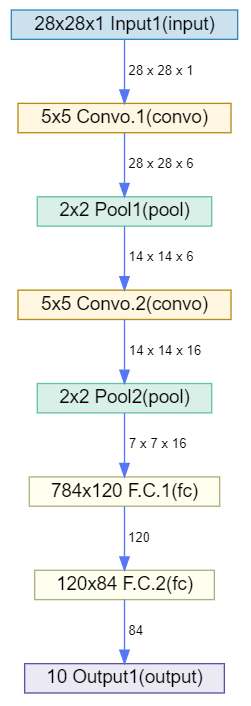

In [ ]:
# код для построения модели #

**Задание 5: Oбучение модели**<br>
а) Обучите построенную модель. Гиперпараметры для обучения уже заданы, менять их не требуется. Не забудьте задать seed, чтобы  ваши результаты были воспроизводимыми. Полученная вами модель должна показать Miscalssification Rate < 15% на тестовой выборке.

In [ ]:
from dlpy.model import *
from dlpy.model import Optimizer
from dlpy.lr_scheduler import *

In [ ]:
# Variable for Number of Epochs
nEpoch=50

# Variable for Number of Threads
nThread=4

# Variable for Batch Size
batchSize=128

# Calculate miniBatch Size
miniBatch=math.ceil(batchSize/nThread)

# Define Learning Rate scheduler parameters
lr_scheduler=ReduceLROnPlateau(conn=s, 
                               cool_down_iters=3, 
                               gamma=0.8, 
                               learning_rate=0.001, 
                               patience=5
                               )

# Define Momentum Solver parameters
solver=MomentumSolver(lr_scheduler=lr_scheduler,
                      clip_grad_max = 100, 
                      clip_grad_min = -100
                      )                       

# Define Solver optimizer parameter settings
optimizer=Optimizer(seed=12345, 
                    algorithm=solver, 
                    mini_batch_size = miniBatch, 
                    log_level=2, 
                    max_epochs=nEpoch, 
                    reg_l2=0.0005
                    )


In [ ]:
# код для обучения модели
train_history = model.fit(

b) Пользуясь значениями в history, постройте график, анологичный изображенному.
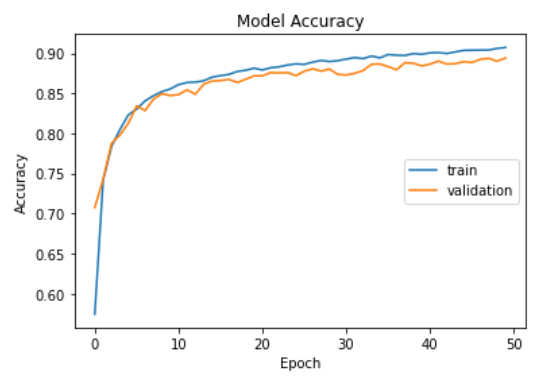

In [ ]:
history = train_history["OptIterHistory"]

#код для построения графика#

**Задание 6: Oценка качества модели**<br>

а) Выведите матрицу ошибок на валидационной выборке для модели и ответьте на следующие вопросы:
- Сколько изображений сумок было корректно классифицированно моделью?
- Сколько пулловеров было классифицированно моделью как рубашки? А наоборот?
- В классификации какого предмета одежды модель ошибалась чаще всего? А реже всего?

In [ ]:
# код для вывода матрицы ошибок#

Ваши ответы на вопросы:
1)
2)
3)

b) Проскорьте модель на тестовой выборке.

In [ ]:
# код для скоринга #

c) Выведите пример изображения, классифицированного верно, с помощью встроенной функции класса Model.

In [ ]:
# код для вывода верно классифицированного изображения#

d) Выведите пример изображения, классифицированного ошибочно, с помощью встроенной функции класса Model.

In [ ]:
# код для вывода неверно классифицированного изображения#

e) Сохраните полученную модель в SAS-таблицу, с помощью одного из методов класса Model.

In [ ]:
# код для сохранения модели #

**Дополнительное задание: Aугментации исходных данных**<br>
Изучите документацию к CAS-action augmentImages. Попробуйте улучшить результат предыдущей модели, применив аугментации к исходным данных и других техник. Полученную модель проскорьте на тестовой выборке и сохраните в SAS-таблицу.

In [ ]:
s.augmentImages(table=train_data,